In [3]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('cleaned_scaled_heart.csv')
X = data.drop(columns= 'target',axis=1)
y =data['target']
pca =PCA()
pca_features = pca.fit_transform(X)
explaind =pca.explained_variance_ratio_.cumsum()
n_components = np.argmax(explaind >= 0.95) + 1
pca =PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
df_pca['target'] = y
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,target
0,1.161170,-0.946448,3.149669,2.330245,0.126219,0.069696,0.984288,-0.575035,-1.496047,-0.450637,0.192113,0.491265,0
1,3.206647,-1.455796,-0.455543,-0.875205,-0.133656,-0.730529,0.295326,1.032152,0.448091,1.511039,-0.998795,-0.987242,2
2,3.139792,0.633788,-0.351042,-0.604954,0.056454,-1.088284,0.546365,0.177399,0.054414,0.462412,0.333356,0.913166,1
3,-0.470435,1.394080,0.323100,2.832008,0.827302,-0.049813,-0.656272,-2.171140,0.890352,0.254330,-1.531375,0.132152,0
4,-2.277420,-0.385573,-0.096178,1.181778,0.825340,-0.212056,0.705452,0.045547,1.063680,0.526370,0.927847,-0.228143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.682629,1.466382,0.603788,1.159166,-0.204090,-0.906044,-0.781188,-0.926031,-2.050010,-0.149180,0.969537,-0.985956,1
299,2.622549,-0.053480,2.171041,-0.087582,-2.172256,0.319385,0.145496,-1.036988,0.877763,-0.774787,-0.708379,0.654218,2
300,1.880752,2.380562,-0.153789,-0.013320,-1.493349,0.390475,0.191458,1.308131,0.267641,0.148165,0.505880,0.061361,3
301,-1.325611,-1.510916,-0.152975,0.881825,0.181521,-0.790715,0.781927,-0.079284,0.348318,0.244394,1.046199,0.473250,1


In [5]:
df_pca.to_csv('pca_transformed_heart.csv', index=False)


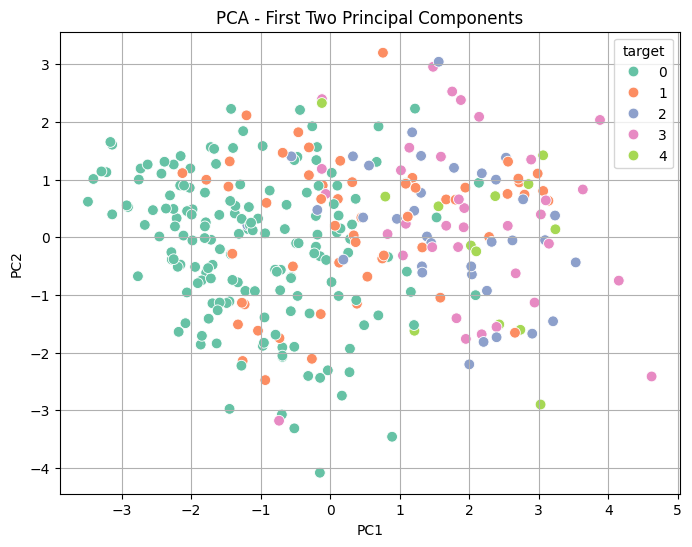

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2', s=60)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - First Two Principal Components')
plt.grid(True)
plt.show()

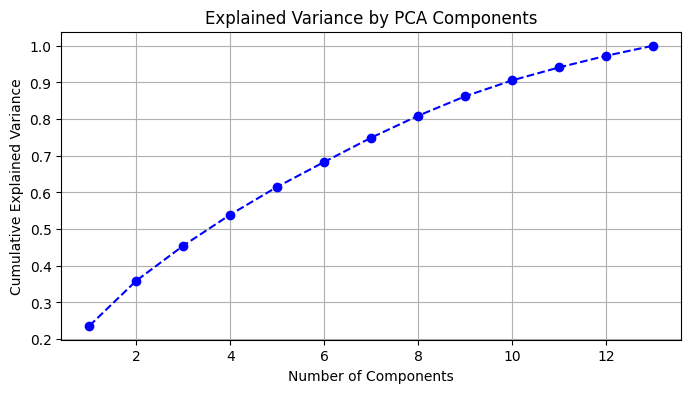

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explaind) + 1), explaind, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()